# Measuring a Security's Risk

The variability of a security is important and is the best measure of risk that we have.

We use variance and standard deviation to measure risk. 

The variance measure the dispersion of a set of data points around their mean value. 

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [9]:
tickers = ['PG', 'BEI.DE']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source = 'yahoo', start='2007-1-1')['Adj Close']

In [10]:
sec_data.tail()

,PG,BEI.DE
Date,,
2021-09-20,142.889999,102.650002
2021-09-21,143.110001,101.750000
2021-09-22,143.600006,101.550003
2021-09-23,144.190002,101.949997
2021-09-24,143.550003,100.849998


In [11]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [12]:
sec_returns

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006544
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002202,0.000202
2007-01-09,-0.002518,-0.022858
...,...,...
2021-09-20,-0.010097,-0.006796
2021-09-21,0.001538,-0.008806
2021-09-22,0.003418,-0.001968


## PG

In [13]:
# daily average return for PG
sec_returns['PG'].mean()

0.0003324283096256554

In [14]:
# Annual average return for PG
sec_returns['PG'].mean() * 250

0.08310707740641385

In [24]:
sec_returns['PG'].std()

0.011753178774844159

In [25]:
sec_returns['PG'].std() *250**0.5

0.18583407337827423

In [26]:
sec_returns[['PG', 'BEI.DE']].mean() * 250

PG        0.083107
BEI.DE    0.057225
dtype: float64

In [28]:
sec_returns[['PG', 'BEI.DE']].std() * 250 ** 0.5

PG        0.185834
BEI.DE    0.217063
dtype: float64

# Benefits of Portfolio Diversification

Share prices are influenced by the state of the ecnomy but different industries are influenced in different ways. 

# Calculating the Covariance Between Securities

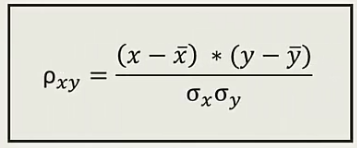

In [29]:
from IPython.display import Image
Image(filename='covariance.png')

The correlation coefficient measures the relationship between two variables. 
- If covariance > 0, the two variables move in the same direction
- If covariance < 0, the two variables move in the opposite directions
- If covariance = 0, the two variables are independent

# Measuring Correlation Between Stocks

Correlation of 1 means that the two are perfectly in sync with each other. A correlation of 0 means they are absolutely independent of each other. A correlation of -1 means they move in perfect opposite directions. 

# Covariance and Correlation

In [30]:
PG_var = sec_returns['PG'].var()
PG_var

0.00013813721131344725

In [31]:
BEI_var = sec_returns['BEI.DE'].var()
BEI_var

0.00018846618517284703

In [32]:
PG_var_a = sec_returns['PG'].var() * 250
PG_var_a

0.03453430282836181

In [33]:
BEI_var_a = sec_returns['BEI.DE'].var() * 250
BEI_var_a

0.047116546293211756

In [34]:
cov_matrix = sec_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000138,0.000044
BEI.DE,0.000044,0.000188


In [35]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,PG,BEI.DE
PG,0.034534,0.010885
BEI.DE,0.010885,0.047117


In [36]:
corr_matrix = sec_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.269493
BEI.DE,0.269493,1.000000


# Considering the Risk of Multiple Securities in a Portfolio

Porfolio Variance for two stocks

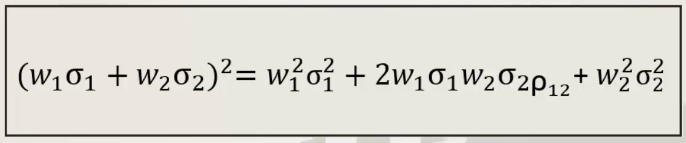

In [38]:
Image(filename='two_stock_portfolio_var.png')

Equal weighting scheme:

In [39]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [40]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.025855444322203366

Portfolio Volatility

In [41]:
pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.16079628205342114

# Systematic vs Idiosyncratic Risk

Un-diversifiable risk - this component depends on the variance of each individual security. It is also known as systematic risk. These cannot be eliminated. Some examples include recession, low consumer spending, wars, forces of nature. These risks impact all stocks. 

Diversifiable risk - idiosyncratic risk (also known as company specific risk). Driven by company-specific events. 

# Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio

In [42]:
weights = np.array([0.5,0.5])

Diversifiable Risk = portfolio variance - weighted annual variances

In [44]:
PG_var_a = sec_returns[['PG']].var() * 250
PG_var_a

PG    0.034534
dtype: float64

In [45]:
BEI_var_a = sec_returns[['BEI.DE']].var() * 250
BEI_var_a

BEI.DE    0.047117
dtype: float64

In [46]:
dr = pfolio_var - (weights[0] ** 2 * PG_var_a) - (weights[1] ** 2 * BEI_var_a)
dr

BEI.DE   NaN
PG       NaN
dtype: float64

In [47]:
PG_var_a = sec_returns['PG'].var() * 250
PG_var_a

0.03453430282836181

In [48]:
BEI_var_a = sec_returns['BEI.DE'].var() * 250
BEI_var_a

0.047116546293211756

In [49]:
dr = pfolio_var - (weights[0] ** 2 * PG_var_a) - (weights[1] ** 2 * BEI_var_a)
dr

0.005442732041809974

Non-Diversifiable Risk

In [50]:
n_dr_1 = pfolio_var - dr
n_dr_1

0.020412712280393392

In [51]:
n_dr_2 = (weights[0] ** 2 * PG_var_a) + (weights[1] ** 2 * BEI_var_a)
n_dr_2

0.020412712280393392